# Deep Learning Lab - Time Series Part

## Dataset

### UCI HAR
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

### UCI HAPT
The experiments were carried out with a group of 30 volunteers within an age bracket of 19-48 years. They performed a protocol of activities composed of six basic activities: three static postures (standing, sitting, lying) and three dynamic activities (walking, walking downstairs and walking upstairs). The experiment also included postural transitions that occurred between the static postures. These are: stand-to-sit, sit-to-stand, sit-to-lie, lie-to-sit, stand-to-lie, and lie-to-stand. All the participants were wearing a smartphone (Samsung Galaxy S II) on the waist during the experiment execution. We captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz using the embedded accelerometer and gyroscope of the device. The experiments were video-recorded to label the data manually. The obtained dataset was randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of 561 features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details.


In [1]:
from DataGeneration import GenerateHARData, GenerateHAPTData
from utils import ShowSegmentation, ShowPosturalTransitions, PlotTimeSeries, PlotLabelDist, FeatureSelection

## Data Understanding

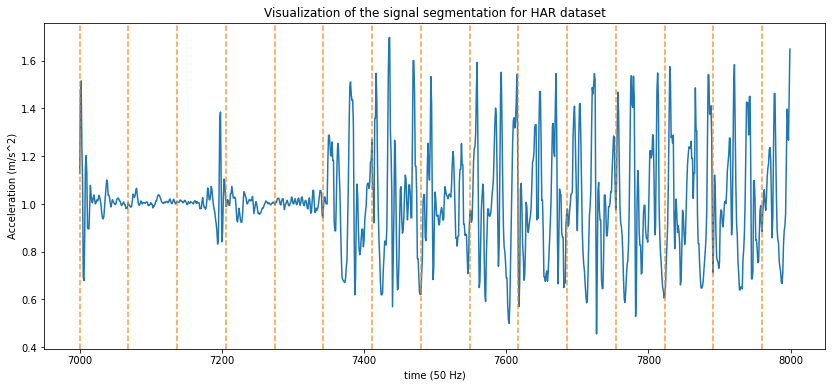

In [6]:
ShowSegmentation()

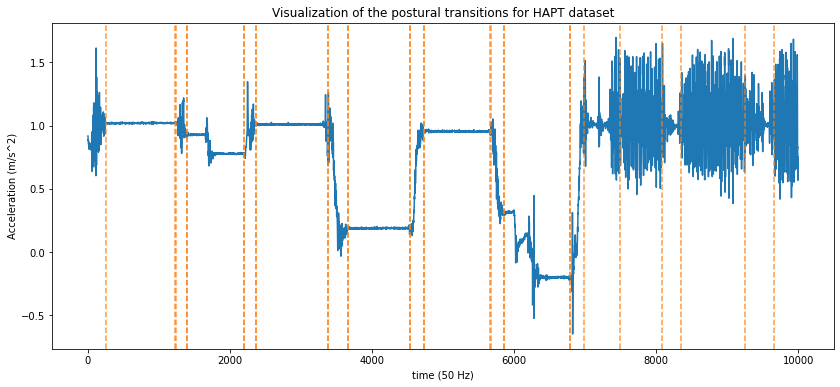

In [2]:
ShowPosturalTransitions()

5


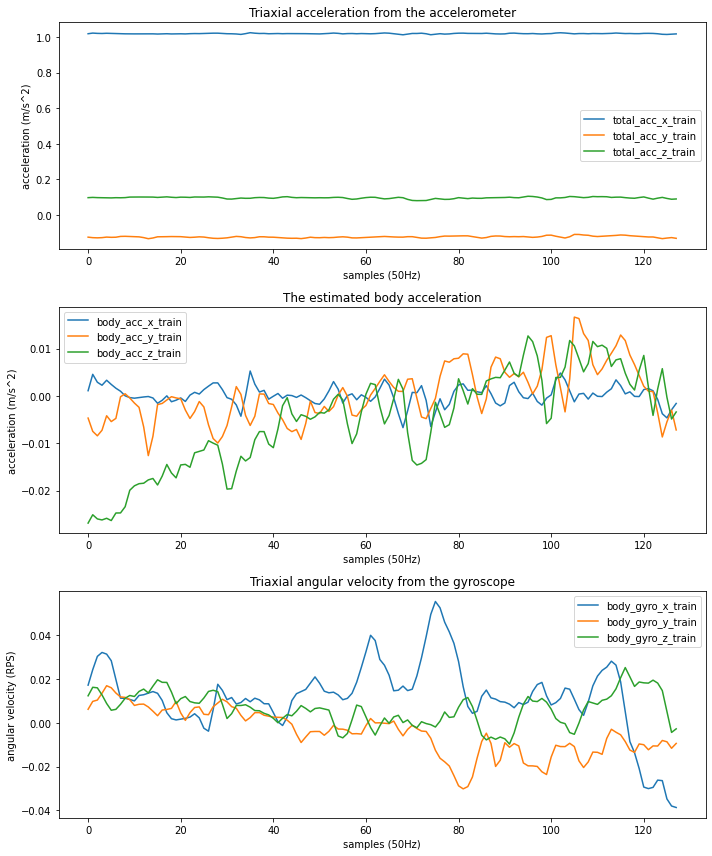

In [2]:
PlotTimeSeries(index=1)

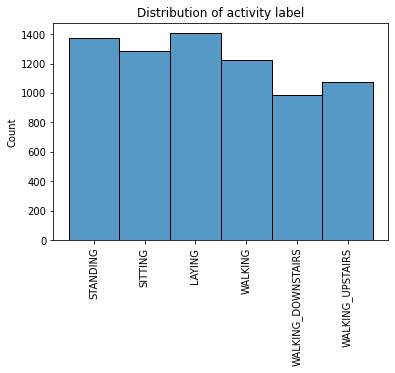

In [2]:
PlotLabelDist()

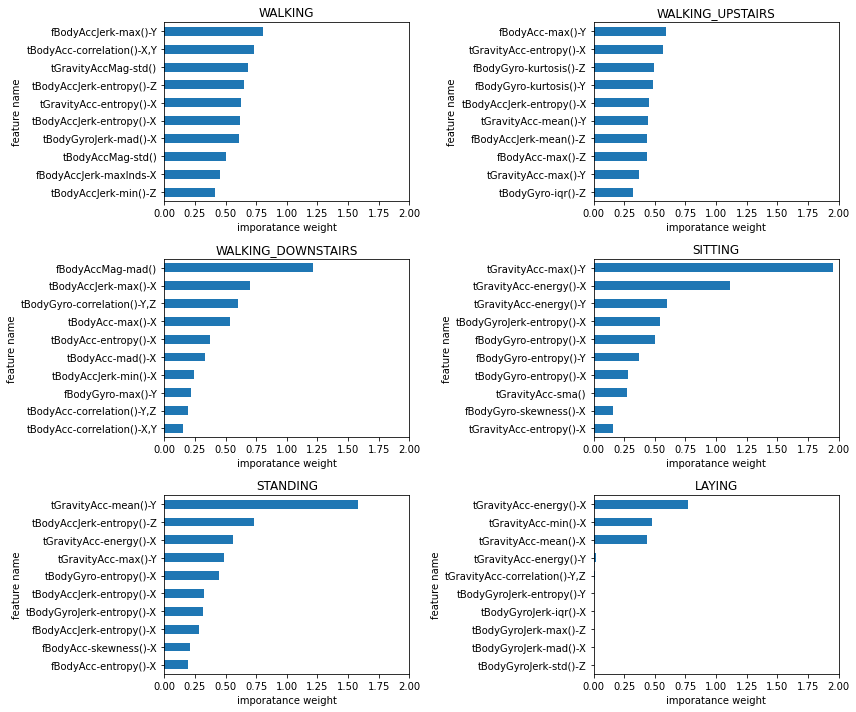

In [2]:
FeatureSelection()

In [3]:
X, y = GenerateHARData().run()

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Conv1D
from tensorflow.python.keras.layers import MaxPooling1D
from tensorflow.python.keras.models import Model

def train_model(X, y, verbose=1, epochs=10, batch_size=32, \
    filters=32, kernel=7, feature_num=100):
    """pre-training process of the PN Encoder"""
    # get dimension
    n_timesteps =  X.shape[1]
    n_features = X.shape[2]
    n_outputs = y.shape[1]
    # define model structure
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=filters, kernel_size=kernel, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(feature_num, activation='relu', name="feature"))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    train_history = \
        model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    return model, train_history

In [8]:
model, train_history = train_model(X,y)

Epoch 1/10
322/322 [==============================] - 3s 7ms/step - loss: 0.3012 - accuracy: 0.8838
Epoch 2/10
322/322 [==============================] - 2s 7ms/step - loss: 0.1294 - accuracy: 0.9500
Epoch 3/10
322/322 [==============================] - 2s 8ms/step - loss: 0.1110 - accuracy: 0.9538
Epoch 4/10
322/322 [==============================] - 2s 7ms/step - loss: 0.1102 - accuracy: 0.9532
Epoch 5/10
322/322 [==============================] - 2s 7ms/step - loss: 0.1077 - accuracy: 0.9580
Epoch 6/10
322/322 [==============================] - 2s 7ms/step - loss: 0.0918 - accuracy: 0.9618
Epoch 7/10
322/322 [==============================] - 2s 7ms/step - loss: 0.1000 - accuracy: 0.9589
Epoch 8/10
322/322 [==============================] - 2s 7ms/step - loss: 0.0914 - accuracy: 0.9631
Epoch 9/10
322/322 [==============================] - 2s 8ms/step - loss: 0.0931 - accuracy: 0.9627
Epoch 10/10
322/322 [==============================] - 2s 7ms/step - loss: 0.0844 - accuracy: 0.9651

Text(0.5, 1.0, 'Learning Curve of Pre-trained Encoder')

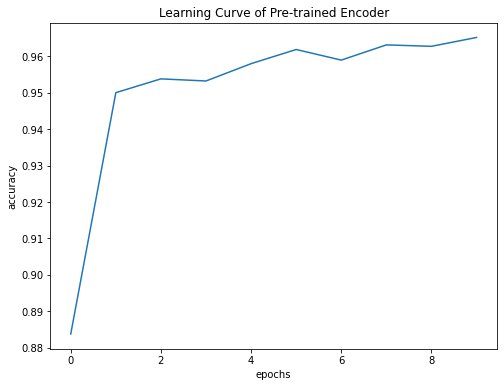

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(train_history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve of Pre-trained Encoder")